<a href="https://colab.research.google.com/github/suryakovvada/artificial_neural_network/blob/main/Copy_of_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Cell 1: Install Libraries
!pip install numpy pandas scikit-learn matplotlib

In [3]:
# Cell 2: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
import numpy as np

class NeuralNetwork:
    """
    A class representing an optimized Artificial Neural Network (ANN)
    for predicting concrete compressive strength.
    """
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Xavier Initialization for better weight distribution
        self.weights_ih = np.random.randn(hidden_size, input_size) * np.sqrt(2 / input_size)
        self.bias_h = np.zeros(hidden_size)
        self.weights_ho = np.random.randn(hidden_size) * np.sqrt(2 / hidden_size)
        self.bias_o = 0

        # Hyperparameters
        self.alpha = 1  # Sigmoid parameter
        self.learning_rate = 0.02  # Reduced learning rate for stability
        self.training_errors = []

    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-self.alpha * x))

    def forward(self, inputs):
        """Forward pass"""
        hidden_input = np.dot(self.weights_ih, inputs) + self.bias_h
        hidden_output = self.sigmoid(hidden_input)

        output_layer_output = np.dot(self.weights_ho, hidden_output) + self.bias_o  # No activation (Linear)
        return hidden_output, output_layer_output

    def backward(self, inputs, desired_output, hidden_output, output_layer_output):
        """Backward pass (Gradient Descent Optimization)"""
        output_error = desired_output - output_layer_output  # Error in output

        # Gradients for hidden layer
        hidden_error = output_error * (hidden_output * (1 - hidden_output)) * self.weights_ho
        dw_output = self.learning_rate * hidden_output * output_error
        db_output = self.learning_rate * output_error
        dw_hidden = np.outer(self.learning_rate * hidden_error, inputs)
        db_hidden = self.learning_rate * hidden_error

        # Update weights and biases
        self.weights_ho += dw_output
        self.bias_o += db_output
        self.weights_ih += dw_hidden
        self.bias_h += db_hidden

    def train(self, training_data, desired_outputs, epochs=100000, batch_size=16):
        """Training with Mini-Batch Gradient Descent"""
        num_samples = len(training_data)
        for epoch in range(epochs):
            total_error = 0
            # Shuffle data
            indices = np.random.permutation(num_samples)
            training_data = training_data[indices]
            desired_outputs = desired_outputs[indices]

            # Mini-batch training
            for i in range(0, num_samples, batch_size):
                batch_inputs = training_data[i:i+batch_size]
                batch_outputs = desired_outputs[i:i+batch_size]

                batch_error = 0
                for inputs, desired_output in zip(batch_inputs, batch_outputs):
                    hidden_output, output_layer_output = self.forward(inputs)
                    self.backward(inputs, desired_output, hidden_output, output_layer_output)
                    batch_error += (desired_output - output_layer_output) ** 2

                batch_avg_error = np.mean(batch_error)
                total_error += batch_avg_error

            avg_epoch_error = total_error / (num_samples / batch_size)
            self.training_errors.append(avg_epoch_error)

            # Display error at every 1000 epochs
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, MSE: {avg_epoch_error:.6f}")

    def predict(self, inputs):
        """Predict new inputs"""
        predictions = []
        for input_sample in inputs:
            _, output_layer_output = self.forward(input_sample)
            predictions.append(output_layer_output)
        return np.array(predictions)


In [5]:
# Cell 5: Data Loading and Preprocessing
from google.colab import files
import io

# Upload the Excel file
uploaded = files.upload()
excel_file = next(iter(uploaded))

df = pd.read_excel(excel_file)

X_columns = ['W/C RATIO ', 'MIX PRAPOTIONS((C : FA : sand : CA))', 'CEMENT CONTENT©(kg/m^3)', 'FLY ASH CONTENT(FA)kg/m^3']

# Check if all columns exist before proceeding
for col in X_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in the Excel file. Please check the spelling and case.")

X = df[X_columns].copy()
y = df['28D(mpa)'].values

def extract_proportions(mix_str):
    try:
        parts = mix_str.split(':')
        return list(map(float, parts))
    except:
        return [np.nan, np.nan, np.nan, np.nan]  # Return 4 NaNs

proportions = X['MIX PRAPOTIONS((C : FA : sand : CA))'].apply(extract_proportions)
X[['Cement_Prop', 'FA_Prop', 'Sand_Prop', 'CA_Prop']] = pd.DataFrame(proportions.tolist(), index=X.index)
X.drop('MIX PRAPOTIONS((C : FA : sand : CA))', axis=1, inplace=True)
X.fillna(X.mean(), inplace=True)

X = X.values
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_scaler = MinMaxScaler()
X_train_scaled = input_scaler.fit_transform(X_train)
X_test_scaled = input_scaler.transform(X_test)

output_scaler = MinMaxScaler()
y_train_scaled = output_scaler.fit_transform(y_train)
y_test_scaled = output_scaler.transform(y_test)

Saving FINAL PROJECT EXCEL.xlsx to FINAL PROJECT EXCEL.xlsx


In [6]:
# Cell 6: Model Initialization and Training
input_size = X_train_scaled.shape[1]
hidden_size = 7
nn = NeuralNetwork(input_size, hidden_size)
nn.train(X_train_scaled, y_train_scaled.flatten())

Epoch 0, MSE: 0.656389
Epoch 1000, MSE: 0.096705
Epoch 2000, MSE: 0.096392
Epoch 3000, MSE: 0.091194
Epoch 4000, MSE: 0.092120
Epoch 5000, MSE: 0.088737
Epoch 6000, MSE: 0.086910
Epoch 7000, MSE: 0.085626
Epoch 8000, MSE: 0.083826
Epoch 9000, MSE: 0.079318
Epoch 10000, MSE: 0.080550
Epoch 11000, MSE: 0.080010
Epoch 12000, MSE: 0.079879
Epoch 13000, MSE: 0.077544
Epoch 14000, MSE: 0.076973
Epoch 15000, MSE: 0.075599
Epoch 16000, MSE: 0.074531
Epoch 17000, MSE: 0.071971
Epoch 18000, MSE: 0.072256
Epoch 19000, MSE: 0.070921
Epoch 20000, MSE: 0.069180
Epoch 21000, MSE: 0.068518
Epoch 22000, MSE: 0.067010
Epoch 23000, MSE: 0.066487
Epoch 24000, MSE: 0.065052
Epoch 25000, MSE: 0.062359
Epoch 26000, MSE: 0.062943
Epoch 27000, MSE: 0.059387
Epoch 28000, MSE: 0.061059
Epoch 29000, MSE: 0.059654
Epoch 30000, MSE: 0.057063
Epoch 31000, MSE: 0.058577
Epoch 32000, MSE: 0.058957
Epoch 33000, MSE: 0.056933
Epoch 34000, MSE: 0.057152
Epoch 35000, MSE: 0.057348
Epoch 36000, MSE: 0.057267
Epoch 37000, M

In [7]:
# Cell 7: Model Evaluation
y_train_pred_scaled = nn.predict(X_train_scaled)
y_test_pred_scaled = nn.predict(X_test_scaled)

y_train_pred = output_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1))
y_test_pred = output_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1))

# Calculate Performance Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("--- Training Performance ---")
print(f"Train Mean Squared Error: {train_mse:.2f}")
print(f"Train Root Mean Squared Error: {train_rmse:.2f}")
print(f"Train R-squared: {train_r2:.4f}")

print("\n--- Testing Performance ---")
print(f"Test Mean Squared Error: {test_mse:.2f}")
print(f"Test Root Mean Squared Error: {test_rmse:.2f}")
print(f"Test R-squared: {test_r2:.4f}")

--- Training Performance ---
Train Mean Squared Error: 1.34
Train Root Mean Squared Error: 1.16
Train R-squared: 0.9498

--- Testing Performance ---
Test Mean Squared Error: 2.06
Test Root Mean Squared Error: 1.44
Test R-squared: 0.9322


Saving actual vs predicted.xlsx to actual vs predicted (2).xlsx


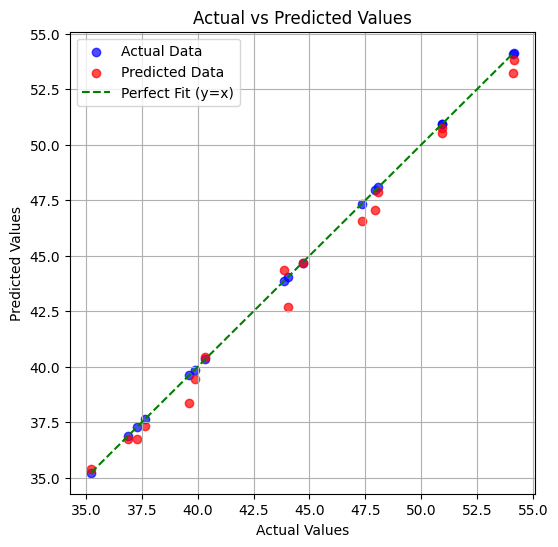


Mean Squared Error (MSE): 0.394147


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the Excel file
uploaded = files.upload()
excel_file = next(iter(uploaded))  # Get the filename

# Step 2: Load the Excel file with engine='openpyxl'
data = pd.read_excel(excel_file, engine='openpyxl')

# Step 3: Define the column names
actual_column = 'Actual'       # Replace with correct column name
predicted_column = 'Predicted' # Replace with correct column name

# Ensure the required columns exist
if actual_column not in data.columns or predicted_column not in data.columns:
    raise ValueError(f"Ensure the Excel file has columns '{actual_column}' and '{predicted_column}'.")

# Step 4: Extract actual and predicted values
actual_values = data[actual_column].values
predicted_values = data[predicted_column].values

# Step 5: Calculate Mean Squared Error (MSE)
mse = np.mean((actual_values - predicted_values) ** 2)

# Step 6: Plot the scatter plot
plt.figure(figsize=(6, 6))

# Plot actual values (blue) and predicted values (red)
plt.scatter(actual_values, actual_values, color='blue', alpha=0.7, label='Actual Data')  # Actual values
plt.scatter(actual_values, predicted_values, color='red', alpha=0.7, label='Predicted Data')  # Predicted values

# Plot the ideal fit line (y = x)
min_value = min(min(actual_values), min(predicted_values))
max_value = max(max(actual_values), max(predicted_values))
plt.plot([min_value, max_value], [min_value, max_value], color='green', linestyle='--', label='Perfect Fit (y=x)')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Step 7: Print the MSE
print(f"\nMean Squared Error (MSE): {mse:.6f}")


In [25]:
# Cell 9: Prediction on New Data
new_data = np.array([[0.48, 475, 71.25, 1, .15, 1.26, 1.83]])
new_data_df = pd.DataFrame(new_data, columns=['W/C RATIO ', 'CEMENT CONTENT©(kg/m^3)', 'FLY ASH CONTENT(FA)kg/m^3', 'Cement_Prop', 'FA_Prop', 'Sand_Prop', 'CA_Prop'])
new_data_scaled = input_scaler.transform(new_data_df)
predicted_strength_scaled = nn.predict(new_data_scaled)
predicted_strength = output_scaler.inverse_transform(predicted_strength_scaled.reshape(-1, 1))
print("\nPredicted compressive strength for new data:", predicted_strength[0][0])


Predicted compressive strength for new data: 37.34420979424531


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [31]:
# Cell 4: Plotting Functions
def plot_loss_curve(training_errors):
    plt.figure(figsize=(10, 6))
    plt.plot(training_errors)
    plt.title('Training Loss Curve')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)
    plt.show()

def plot_actual_vs_predicted(y_actual, y_predicted, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_predicted)
    plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'k--', lw=2)  # Diagonal line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.grid(True)
    plt.show()

def plot_residuals(y_actual, y_predicted, title):
    residuals = y_actual - y_predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_predicted, residuals)
    plt.axhline(y=0, color='k', linestyle='--', lw=2)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.title(title)
    plt.grid(True)
    plt.show()